In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("resources/rated_bond_funds.csv")
df.head()

,Name,Ticker,Category,Analyst Rating,Recommend,Fund Age,Fee Level Rank,Star Rating,Fund Size Rank,Est Fund-Level Net Flow 1 Yr Rank,...,Eurozone Crisis June - Sep 2011 Rank,Taper Tantrum May - Aug 2013 Rank,EM LC Sell-Off Sep - Dec 2014 Rank,HY Sell-Off June 2015 - Feb 2016 Rank,IR Shock Aug - Dec 2016 Rank,IR Shock 2018 Jan - Oct 2018 Rank,EM LC Sell-Off April - Oct 2019 Rank,HY Equity Sell-Off Oct - Dec 2018 Rank,2008 Return Rank,2009 Return Rank
0,Columbia Floating Rate Inst,CFRZX,US Fund Bank Loan,Neutral,0,9,66.0,4.0,41.0,44.0,...,96.0,7.0,67.0,48.0,41.0,17.0,57.0,71.0,76.0,45.0
1,Credit Suisse Floating Rate Hi Inc Instl,CSHIX,US Fund Bank Loan,Bronze,1,19,25.0,5.0,19.0,82.0,...,27.0,40.0,39.0,46.0,27.0,52.0,22.0,35.0,35.0,10.0
2,Delaware Floating Rate Instl,DDFLX,US Fund Bank Loan,Neutral,0,9,24.0,2.0,78.0,32.0,...,7.0,97.0,42.0,26.0,100.0,19.0,12.0,15.0,50.0,50.0
3,Eaton Vance Floating-Rate & Hi Inc Inst,EIFHX,US Fund Bank Loan,Bronze,1,19,55.0,5.0,33.0,64.0,...,47.0,70.0,44.0,63.0,18.0,22.0,15.0,56.0,82.0,15.0
4,Eaton Vance Floating-Rate Advantage I,EIFAX,US Fund Bank Loan,Bronze,1,11,95.0,5.0,5.0,84.0,...,67.0,30.0,48.0,78.0,9.0,1.0,1.0,90.0,94.0,1.0


In [3]:
target = df["Recommend"]
target_names = ["sell", "buy"]

In [4]:
data = df.drop(["Name", "Ticker", "Category", "Analyst Rating","Recommend"], axis=1)
feature_names = data.columns
data.head()

,Fund Age,Fee Level Rank,Star Rating,Fund Size Rank,Est Fund-Level Net Flow 1 Yr Rank,Est Fund-Level Net Flow 3 Yr Rank,Est Fund-Level Net Flow 5 Yr Rank,Flows % 1 Yr Rank,Longest Manager Tenure Rank,Average Manager Tenure Rank,...,Eurozone Crisis June - Sep 2011 Rank,Taper Tantrum May - Aug 2013 Rank,EM LC Sell-Off Sep - Dec 2014 Rank,HY Sell-Off June 2015 - Feb 2016 Rank,IR Shock Aug - Dec 2016 Rank,IR Shock 2018 Jan - Oct 2018 Rank,EM LC Sell-Off April - Oct 2019 Rank,HY Equity Sell-Off Oct - Dec 2018 Rank,2008 Return Rank,2009 Return Rank
0,9,66.0,4.0,41.0,44.0,24.0,53.0,30.0,47,61,...,96.0,7.0,67.0,48.0,41.0,17.0,57.0,71.0,76.0,45.0
1,19,25.0,5.0,19.0,82.0,49.0,14.0,70.0,10,19,...,27.0,40.0,39.0,46.0,27.0,52.0,22.0,35.0,35.0,10.0
2,9,24.0,2.0,78.0,32.0,71.0,61.0,73.0,44,42,...,7.0,97.0,42.0,26.0,100.0,19.0,12.0,15.0,50.0,50.0
3,19,55.0,5.0,33.0,64.0,37.0,72.0,56.0,4,16,...,47.0,70.0,44.0,63.0,18.0,22.0,15.0,56.0,82.0,15.0
4,11,95.0,5.0,5.0,84.0,2.0,20.0,35.0,1,5,...,67.0,30.0,48.0,78.0,9.0,1.0,1.0,90.0,94.0,1.0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [9]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf_model = rf.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.7297297297297297

In [10]:
importance_list = sorted(zip(rf_model.feature_importances_, feature_names), reverse=True)
importance_list

[(0.06409357078617062, 'Fund Size Rank'),
 (0.03852866164920228, 'Fund Age'),
 (0.034270530830915164, 'Credit Qual BBB Rank'),
 (0.02992160465243672, 'Est Fund-Level Net Flow 1 Yr Rank'),
 (0.028042426557528626, 'Fee Level Rank'),
 (0.026136308828266386, 'HY Equity Sell-Off Oct - Dec 2018 Rank'),
 (0.025994766788865576, 'Credit Qual AAA Rank'),
 (0.023072819527473816, '3 Yr R2 Rank'),
 (0.022051402400688355, '5 Yr Max Drawdown Rank'),
 (0.02110734043650626, 'HY Sell-Off June 2015 - Feb 2016 Rank'),
 (0.019947206513509494, 'Longest Manager Tenure Rank'),
 (0.0192755066148617, 'EM LC Sell-Off Sep - Dec 2014 Rank'),
 (0.019038367599028837, 'Taper Tantrum May - Aug 2013 Rank'),
 (0.018750375978234868, 'Est Fund-Level Net Flow 5 Yr Rank'),
 (0.01829488913404506, 'Corporate Bond Rank'),
 (0.017818968644826266, 'Credit Qual A Rank'),
 (0.01751793922538865, '10 Yr Return Rank'),
 (0.01748896177235409, '5 Yr Sharpe Ratio Rank'),
 (0.017126060977525292, '# of Holdings Rank'),
 (0.017123397705892

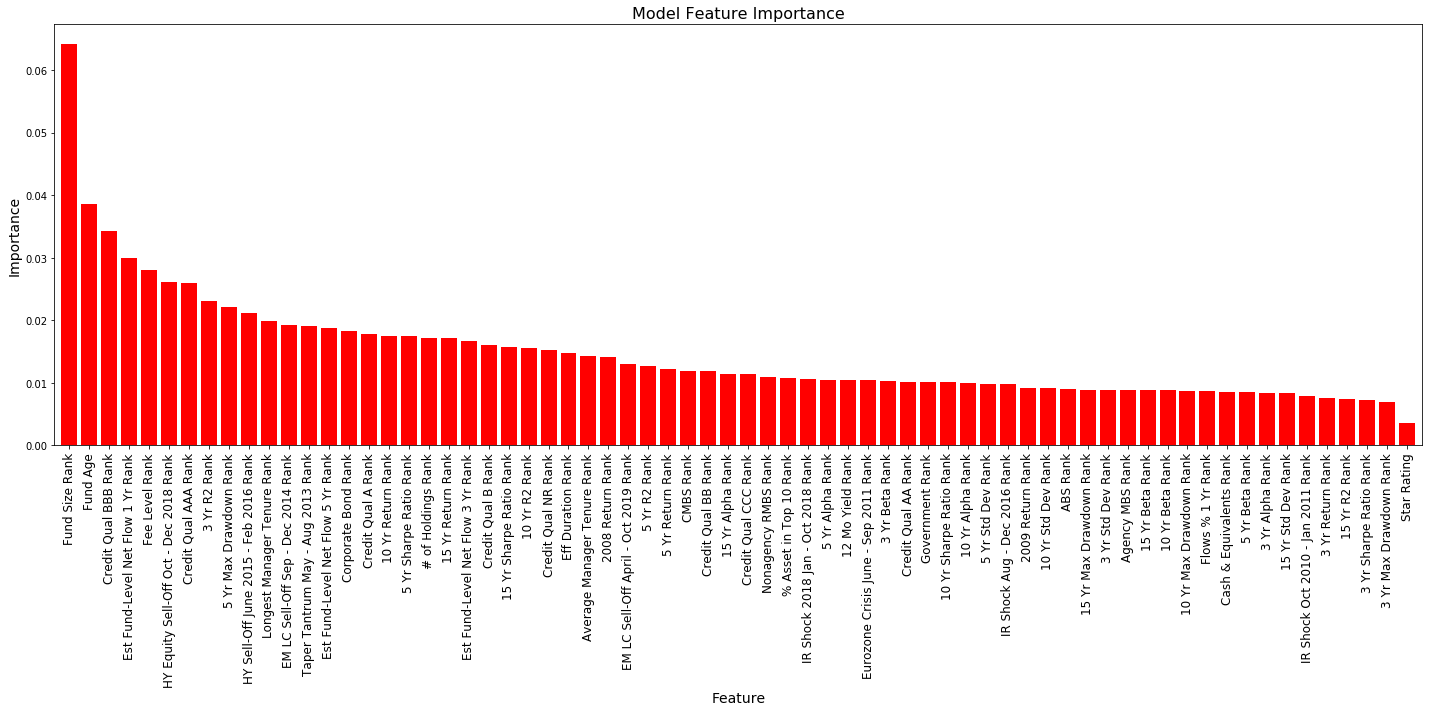

In [30]:
# Create plot
importance_df = pd.DataFrame(importance_list, columns = ['Importance', 'Feature'])

importances = importance_df['Importance']
features = importance_df['Feature']
x_axis = np.arange(len(features))

plt.figure(figsize=(20, 10))
plt.bar(x_axis, importances, color="r", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, features, rotation=90, fontsize=12)
plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylabel('Importance', fontsize=14)
plt.title('Model Feature Importance', fontsize=16)
plt.xlabel('Feature', fontsize=14)

plt.tight_layout()
plt.savefig("images/rf_importance.png")
plt.show()

In [13]:
# Predict
predictions = rf_model.predict(X_test)
rf_results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
rf_results.head(10)

,Prediction,Actual
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
5,0,0
6,0,1
7,0,0
8,0,0
9,0,0


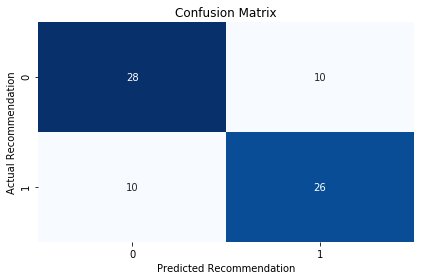

In [17]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

recommendations = [0, 1]

matrix = confusion_matrix(y_test, predictions, labels=recommendations)

# Create pandas dataframe
matrix_df = pd.DataFrame(matrix, columns=recommendations, index=recommendations)

# Create heatmap
sns.heatmap(matrix_df, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("Actual Recommendation"), plt.xlabel("Predicted Recommendation")

plt.tight_layout()
plt.savefig("images/rf_confusion_matrix.png")
plt.show()

In [18]:
# Multiclass (ratings) random forest
target_multi = df["Analyst Rating"]
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(data, target_multi, random_state=42)

rfm = RandomForestClassifier(n_estimators=200)
rfm_model = rfm.fit(X_train_m, y_train_m)
rfm_model.score(X_test_m, y_test_m)

0.4864864864864865

In [26]:
# Importances
importance_list_m = sorted(zip(rfm_model.feature_importances_, feature_names), reverse=True)
importance_list_m


[(0.04857242300550653, 'Fund Size Rank'),
 (0.02659178030415499, 'Fee Level Rank'),
 (0.0252494367905354, 'Credit Qual BBB Rank'),
 (0.02507575147534834, 'HY Equity Sell-Off Oct - Dec 2018 Rank'),
 (0.024311871073328467, 'Est Fund-Level Net Flow 1 Yr Rank'),
 (0.022625646575254295, 'Fund Age'),
 (0.02245095918110017, 'EM LC Sell-Off Sep - Dec 2014 Rank'),
 (0.021506622089122747, 'Corporate Bond Rank'),
 (0.021102370099221467, 'Credit Qual NR Rank'),
 (0.0198394293522383, '3 Yr R2 Rank'),
 (0.019520448210363608, 'Est Fund-Level Net Flow 3 Yr Rank'),
 (0.018823470123787003, '10 Yr Return Rank'),
 (0.018598223400013617, '5 Yr Max Drawdown Rank'),
 (0.017759486184623183, 'Average Manager Tenure Rank'),
 (0.017611573230828802, 'Est Fund-Level Net Flow 5 Yr Rank'),
 (0.01745340172010706, '5 Yr Sharpe Ratio Rank'),
 (0.01733657694216145, 'Credit Qual AAA Rank'),
 (0.015802983711494058, 'Eff Duration Rank'),
 (0.015424031931879625, 'Taper Tantrum May - Aug 2013 Rank'),
 (0.015360622340541242, 

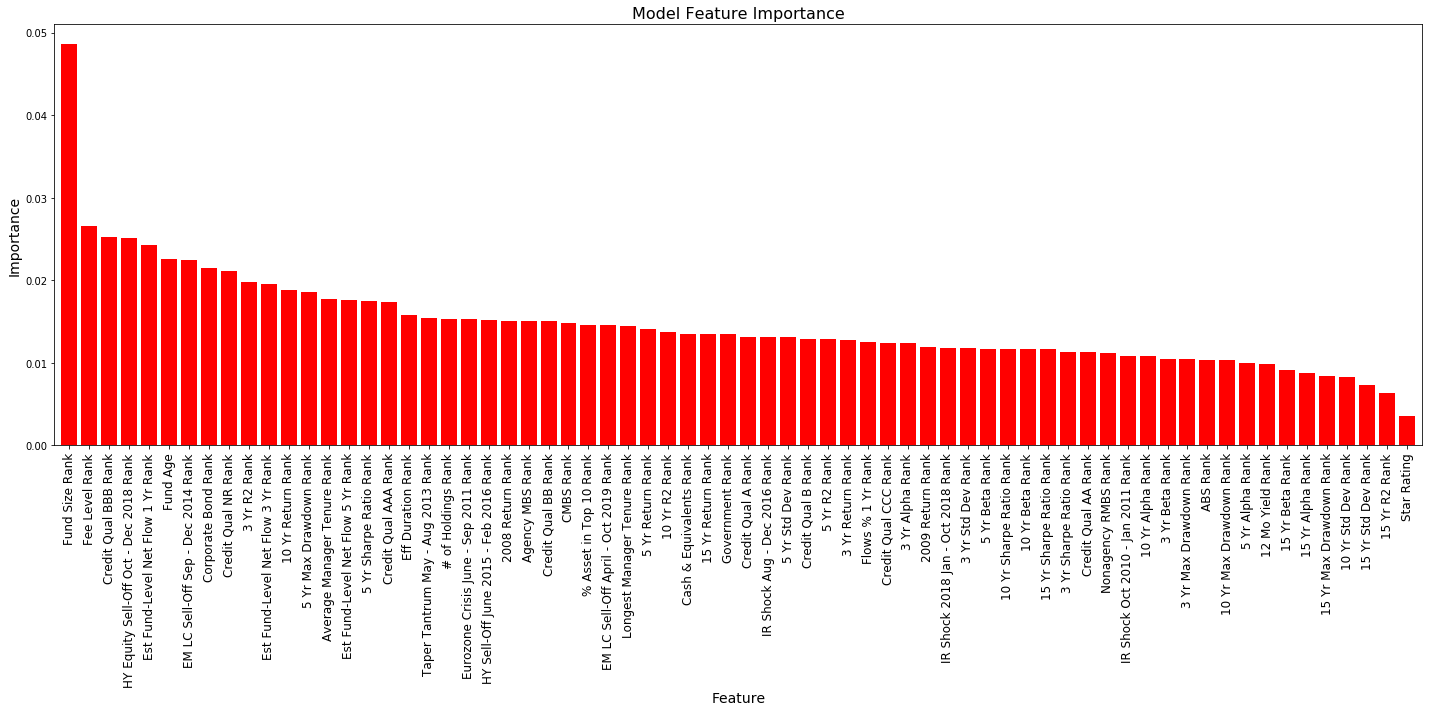

In [31]:
# Create plot
importance_m_df = pd.DataFrame(importance_list_m, columns = ['Importance', 'Feature'])

importances_m = importance_m_df['Importance']
features_m = importance_m_df['Feature']
x_axis_m = np.arange(len(features_m))

plt.figure(figsize=(20, 10))
plt.bar(x_axis_m, importances_m, color="r", align="center")

tick_locations_m = [value for value in x_axis_m]
plt.xticks(tick_locations_m, features_m, rotation=90, fontsize=12)
plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylabel('Importance', fontsize=14)
plt.title('Model Feature Importance', fontsize=16)
plt.xlabel('Feature', fontsize=14)

plt.tight_layout()
plt.savefig("images/rfm_importance.png")
plt.show()

In [20]:
# Predict
predictions_rfm = rfm_model.predict(X_test_m)
rfm_results = pd.DataFrame({"Prediction": predictions_rfm, "Actual": y_test_m}).reset_index(drop=True)
rfm_results.head(10)

,Prediction,Actual
0,Bronze,Bronze
1,Neutral,Bronze
2,Neutral,Neutral
3,Neutral,Silver
4,Silver,Gold
5,Neutral,Neutral
6,Neutral,Bronze
7,Neutral,Neutral
8,Neutral,Neutral
9,Neutral,Neutral


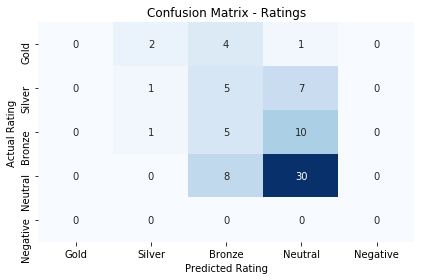

In [21]:
# Create confusion matrix
ratings_names = ["Gold", "Silver", "Bronze", "Neutral", "Negative"]
matrix = confusion_matrix(y_test_m, predictions_rfm, labels=ratings_names)

# Create pandas dataframe
matrix_df = pd.DataFrame(matrix, columns=ratings_names, index=ratings_names)

# Create heatmap
sns.heatmap(matrix_df, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix - Ratings"), plt.tight_layout()
plt.ylabel("Actual Rating"), plt.xlabel("Predicted Rating")

plt.tight_layout()
plt.savefig("images/rfm_confusion_matrix.png")
plt.show()

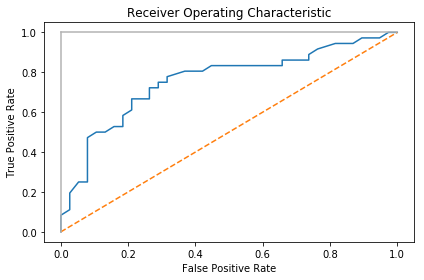

In [23]:
# Receiving Operating Characteristic Curve
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score

# Create feature matrix and target vector
data, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)

# Get predicted probabilities
target_probabilities = rf_model.predict_proba(X_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,
                                                               target_probabilities)

# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

plt.tight_layout()
plt.savefig("images/rf_roc.png")
plt.show()